In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("./../assets/dados.csv")
coluns_to_remove = list(filter(lambda colum: 'Unnamed' in colum, df.columns))
df = df.drop(columns=coluns_to_remove)
df[df.isna()] = 0
df.to_csv("./../assets/dados.csv")
df = pd.concat([pd.read_csv("./../assets/url.csv"),df], 
                axis=1)
print(len(coluns_to_remove),coluns_to_remove)
df

1 ['Unnamed: 0']


,Nome,Data,url,1.2.1 sum,1.2.1 mean,1.2.1 count,1.2.1 stdr,1.2.2 sum,1.2.2 mean,1.2.2 count,...,qualquer count,qualquer stdr,3.1.1 sum,3.1.1 mean,3.1.1 count,3.1.1 stdr,3.1.2 sum,3.1.2 mean,3.1.2 count,3.1.2 stdr
0,AAZQ,30/06/2024,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAZQ,31/03/2024,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,4475406.0,4475406.0,1.0,443065194.0,1.567401e+08,5.805189e+06,27.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAZQ,31/12/2023,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,4688049.6,4688049.6,1.0,464116910.4,1.532604e+08,6.966381e+06,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAZQ,30/09/2023,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AAZQ,30/06/2023,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,0.0,0.0,0.0,0.0,1.748127e+08,1.165418e+07,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,XPCA,31/12/2022,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,XPCA,30/09/2022,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,XPCA,30/6/2022,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,XPCA,31/03/2022,https://fnet.bmfbovespa.com.br/fnet/publico/ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for colum in df.columns:
    if("Unnamed" in colum):
        print(colum)

In [6]:
import yfinance as yf

In [7]:
def get_all_data():
    list_all_funds = pd.read_csv("./../assets/url.csv")
    funds_data = pd.DataFrame()
    for fund in list_all_funds['Nome']:
        fund_string = f"{fund}11.SA".upper()
        new_yf = yf.download(fund_string)
        new_yf.to_csv(f"./../assets/q/{fund_string}.csv")
        # new_yf['ticker'] = fund
        # new_yf['data'] = new_yf["Open"].index
        # funds_data = pd.concat([funds_data, new_yf])
        # return new_yf
    # return funds_data
# get_all_data()

In [8]:
import os
quotes_path = '../assets/q'
all_quoters = os.listdir(quotes_path)
quote_df = pd.DataFrame()
print(all_quoters)
for quote in all_quoters:
    data = pd.read_csv(f"{quotes_path}/{quote}")[2:]
    data['ticker'] = quote[:6]
    data.columns = map(lambda column: 'Data' if(column == 'Price') else column, data.columns)
    quote_df = pd.concat([data,quote_df],axis='index')
quote_df

['GRWA11.SA.csv', 'RZAG11.SA.csv', 'VGIA11.SA.csv', 'PLCA11.SA.csv', 'CRAA11.SA.csv', 'indice.csv', 'FZDB11.SA.csv', 'RURA11.SA.csv', 'KNCA11.SA.csv', 'EGAF11.SA.csv', 'FLEM11.SA.csv', 'JGPX11.SA.csv', 'DCRA11.SA.csv', 'RZEO11.SA.csv', 'SNAG11.SA.csv', 'NCRA11.SA.csv', 'IAGR11.SA.csv', 'HGAG11.SA.csv', 'VCRA11.SA.csv', 'KOPA11.SA.csv', 'AAZQ11.SA.csv', 'IAAG11.SA.csv', 'XPCA11.SA.csv', 'GCRA11.SA.csv', 'BBGO11.SA.csv', 'OIAG11.SA.csv', 'AGRX11.SA.csv', 'LSAG11.SA.csv', 'FGAA11.SA.csv', 'CPTR11.SA.csv']


,Data,Close,High,Low,Open,Volume,ticker,Adj Close,Mount
2,2022-06-22,0.8284659385681152,0.8284659385681152,0.8284659385681152,0.8284659385681152,10290,CPTR11,NaN,NaN
3,2022-06-23,0.8284659385681152,0.8284659385681152,0.8284659385681152,0.8284659385681152,400,CPTR11,NaN,NaN
4,2022-06-24,0.8284659385681152,0.8284659385681152,0.8284659385681152,0.8284659385681152,190,CPTR11,NaN,NaN
5,2022-06-27,0.8326082229614258,0.8326082229614258,0.8284658777708389,0.8284658777708389,170,CPTR11,NaN,NaN
6,2022-06-28,0.8326082229614258,0.8326082229614258,0.8326082229614258,0.8326082229614258,300,CPTR11,NaN,NaN
...,...,...,...,...,...,...,...,...,...
451,2024-12-26,8.9399995803833,8.949999809265137,8.0,8.720000267028809,11336,GRWA11,NaN,NaN
452,2024-12-27,8.729999542236328,8.899999618530273,8.600000381469727,8.899999618530273,591,GRWA11,NaN,NaN
453,2024-12-30,8.729999542236328,8.729999542236328,8.550000190734863,8.600000381469727,921,GRWA11,NaN,NaN
454,2025-01-02,8.710000038146973,8.800000190734863,8.529999732971191,8.550000190734863,143,GRWA11,NaN,NaN


In [9]:
quote_df['Mount'] = quote_df['Data'].str[:7]
quote_df = quote_df.drop(columns=['Data','Adj Close','Volume'])
quote_df.groupby(['Mount','ticker']).corr()



Close      High       Low      Open
Mount   ticker                                              
2021-10 RZAG11 Close  1.000000  0.589710  0.784890  0.609676
               High   0.589710  1.000000  0.187623  0.839248
               Low    0.784890  0.187623  1.000000  0.359378
               Open   0.609676  0.839248  0.359378  1.000000
2021-11 JGPX11 Close  1.000000 -1.000000  1.000000  1.000000
...                        ...       ...       ...       ...
2025-01 XPCA11 Open  -1.000000 -1.000000 -1.000000  1.000000
        indice Close  1.000000  0.883414  0.973979  0.916261
               High   0.883414  1.000000  0.903974  0.962096
               Low    0.973979  0.903974  1.000000  0.911726
               Open   0.916261  0.962096  0.911726  1.000000

[3016 rows x 4 columns]

In [10]:
quote_df.dtypes

Close     object
High      object
Low       object
Open      object
ticker    object
Mount     object
dtype: object

In [11]:
for colum in quote_df.columns:
    if colum not in ['Mount','ticker']:
        quote_df[colum] = pd.to_numeric(quote_df[colum])

quote_df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
ticker     object
Mount      object
dtype: object

In [12]:
quote_df.groupby(['Mount','ticker'])['Open'].var()


Mount    ticker
2021-10  RZAG11    0.008886
2021-11  JGPX11    0.024130
         RZAG11    0.026305
         XPCA11    0.207101
2021-12  JGPX11    1.871287
                     ...   
2025-01  SNAG11    0.031250
         VCRA11    0.105800
         VGIA11    0.012800
         XPCA11    0.004050
         indice    0.012963
Name: Open, Length: 754, dtype: float64

In [13]:
quote_df.groupby(['Mount','ticker','Open']).mean()

Close      High       Low
Mount   ticker Open                                  
2021-10 RZAG11 6.032396  6.076245  6.163943  6.013603
               6.113831  6.007340  6.126359  5.894585
               6.138887  6.082510  6.189000  6.019868
               6.195265  6.151415  6.201529  6.101302
               6.201526  6.176470  6.264168  6.113828
...                           ...       ...       ...
2025-01 indice 7.663769  7.575000  7.673633  7.545410
               7.673633  7.594727  7.772266  7.545410
               7.732813  7.722949  7.742676  7.624316
               7.732813  7.732813  7.742676  7.614453
               7.752539  7.703223  7.791992  7.663770

[14298 rows x 3 columns]

In [32]:
indice = yf.download("FGAA11.SA", multi_level_index=False)
indice

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2023-02-14,7.408829,7.408829,7.363881,7.378864,89707
2023-02-15,7.431302,7.431302,7.386354,7.408828,81663
2023-02-16,7.401335,7.446282,7.378862,7.431300,102418
2023-02-17,7.438794,7.461268,7.378864,7.378864,74722
2023-02-22,7.438794,7.453776,7.378864,7.438794,74910
...,...,...,...,...,...
2025-01-09,7.410000,7.580000,7.360000,7.570000,257405
2025-01-10,7.470000,7.520000,7.420000,7.480000,69210
2025-01-13,7.430000,7.520000,7.410000,7.470000,76045


In [15]:
indice.dtypes

Price   Ticker   
Close   FGAA11.SA    float64
High    FGAA11.SA    float64
Low     FGAA11.SA    float64
Open    FGAA11.SA    float64
Volume  FGAA11.SA      int64
dtype: object

In [16]:
indice.describe()

Price,Close,High,Low,Open,Volume
Ticker,FGAA11.SA,FGAA11.SA,FGAA11.SA,FGAA11.SA,FGAA11.SA
count,478.000000,478.000000,478.000000,478.000000,4.780000e+02
mean,7.837173,7.882179,7.791473,7.839652,1.511313e+05
std,0.288814,0.282320,0.293123,0.287521,7.449342e+04
min,7.022656,7.091699,6.953613,7.022656,5.411900e+04
25%,7.678187,7.743219,7.613388,7.679372,1.097355e+05
50%,7.827963,7.870848,7.781514,7.828834,1.365675e+05
75%,8.041347,8.081973,8.006221,8.041347,1.717690e+05
max,8.421646,8.459581,8.393195,8.421646,1.032413e+06


In [28]:
indice['Open'].values

array([7.37886241, 7.40883048, 7.43130157, 7.37886339, 7.43879318,
       7.43879406, 7.43130268, 7.44628353, 7.4537753 , 7.46875898,
       7.44628475, 7.41631985, 7.41631985, 7.42381257, 7.43889315,
       7.41612123, 7.37057725, 7.39334742, 7.37816576, 7.34780378,
       7.31744046, 7.35539341, 7.36298474, 7.31744099, 7.34780435,
       7.30226076, 7.40093946, 7.43130185, 7.39334803, 7.4237108 ,
       7.4085291 , 7.38575731, 7.38575697, 7.39334884, 7.38575796,
       7.43130196, 7.43130196, 7.43889396, 7.42349193, 7.42349193,
       7.40038919, 7.40038963, 7.45429322, 7.46199568, 7.49279852,
       7.48509606, 7.44659402, 7.42349007, 7.3541853 , 7.39268904,
       7.39268983, 7.46969461, 7.4850969 , 7.4850969 , 7.47739682,
       7.50830369, 7.48488899, 7.45367083, 7.41464272, 7.39903453,
       7.49269444, 7.57074165, 7.56293767, 7.57074165, 7.57074323,
       7.5941572 , 7.55513351, 7.49269705, 7.53952277, 7.53171778,
       7.53952599, 7.53952378, 7.5161076 , 7.51610899, 7.52391

<Axes: xlabel='Date'>

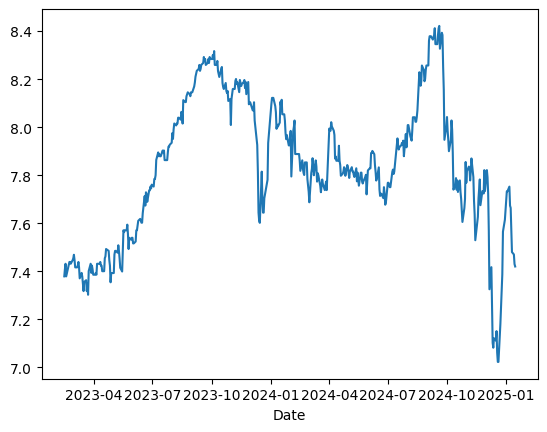

In [29]:
sns.lineplot(y=indice['Open'].values,x=indice['Open'].index)

In [33]:
indice['Mount'] = indice.index.to_period('M')
# indice['Mount'] = indice['Mount'].to_string()
indice.to_csv('./../assets/q/indice.csv')

In [34]:
indice = pd.read_csv('./../assets/q/indice.csv')
indice


,Date,Close,High,Low,Open,Volume,Mount
0,2023-02-14,7.408829,7.408829,7.363881,7.378864,89707,2023-02
1,2023-02-15,7.431302,7.431302,7.386354,7.408828,81663,2023-02
2,2023-02-16,7.401335,7.446282,7.378862,7.431300,102418,2023-02
3,2023-02-17,7.438794,7.461268,7.378864,7.378864,74722,2023-02
4,2023-02-22,7.438794,7.453776,7.378864,7.438794,74910,2023-02
...,...,...,...,...,...,...,...
473,2025-01-09,7.410000,7.580000,7.360000,7.570000,257405,2025-01
474,2025-01-10,7.470000,7.520000,7.420000,7.480000,69210,2025-01
475,2025-01-13,7.430000,7.520000,7.410000,7.470000,76045,2025-01
476,2025-01-14,7.360000,7.440000,7.330000,7.430000,146818,2025-01


In [38]:
indice = indice.drop(columns=['Date'])
for colum in indice.columns :
    print(colum)
    if colum not in ['Mount']: 
        indice[colum] = pd.to_numeric(indice[colum])
indice.dtypes


Close
High
Low
Open
Volume
Mount


Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
Mount      object
dtype: object

In [39]:
indice.groupby(['Mount']).var()['Open']

Mount
2023-02    0.000778
2023-03    0.001934
2023-04    0.001323
2023-05    0.003296
2023-06    0.006871
2023-07    0.002516
2023-08    0.003885
2023-09    0.001709
2023-10    0.005936
2023-11    0.001175
2023-12    0.032824
2024-01    0.004484
2024-02    0.007096
2024-03    0.002264
2024-04    0.005860
2024-05    0.000735
2024-06    0.005519
2024-07    0.005830
2024-08    0.012481
2024-09    0.016849
2024-10    0.016353
2024-11    0.007411
2024-12    0.074387
2025-01    0.017887
Name: Open, dtype: float64

In [40]:
indice.groupby([indice['Mount']]).sum()

,Close,High,Low,Open,Volume
Mount,,,,,
2023-02,66.904186,67.054010,66.477186,66.806800,812782
2023-03,169.880416,170.788814,169.191155,169.963317,2701982
2023-04,133.631979,134.085438,132.995348,133.625267,1646129
2023-05,165.230757,166.126863,163.962935,165.130647,2426948
2023-06,160.759700,161.162431,159.930938,160.641142,3427751
2023-07,165.480162,165.888519,164.560605,165.289480,3035278
2023-08,185.731541,186.031677,184.815608,185.505303,3822809
2023-09,165.005489,165.432733,164.235033,164.957242,2444656
2023-10,172.081781,172.839189,171.276658,172.290033,3357019


In [48]:
ifix = yf.download('XFIX11.SA',multi_level_index=False,)
ifix['Month'] = ifix.index.to_period('M')
# ifix.to_csv('./../assets/q/IFIX.csv')
ifix

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,Month
Date,,,,,,
2021-01-12,10.22,10.26,10.21,10.26,24927,2021-01
2021-01-13,10.21,10.53,10.20,10.25,52700,2021-01
2021-01-14,10.22,10.23,10.20,10.22,33118,2021-01
2021-01-15,10.23,10.24,10.20,10.22,28232,2021-01
2021-01-18,10.24,10.25,10.21,10.23,30654,2021-01
...,...,...,...,...,...,...
2025-01-09,10.92,11.05,10.92,11.05,9376,2025-01
2025-01-10,10.94,10.98,10.82,10.82,16517,2025-01
2025-01-13,10.91,11.06,10.85,11.05,23075,2025-01


In [54]:
ifix.groupby(['Month']).var()['Open']

Month
2021-01    0.000541
2021-02    0.001153
2021-03    0.008575
2021-04    0.001075
2021-05    0.000501
2021-06    0.023019
2021-07    0.014736
2021-08    0.020445
2021-09    0.006156
2021-10    0.018042
2021-11    0.026989
2021-12    0.076505
2022-01    0.004193
2022-02    0.040703
2022-03    0.003514
2022-04    0.004089
2022-05    0.003739
2022-06    0.001716
2022-07    0.003806
2022-08    0.038206
2022-09    0.003615
2022-10    0.001462
2022-11    0.043925
2022-12    0.022613
2023-01    0.005758
2023-02    0.003559
2023-03    0.007378
2023-04    0.009904
2023-05    0.039786
2023-06    0.018495
2023-07    0.001443
2023-08    0.002124
2023-09    0.002559
2023-10    0.002986
2023-11    0.004641
2023-12    0.021906
2024-01    0.002746
2024-02    0.000814
2024-03    0.002342
2024-04    0.006919
2024-05    0.003546
2024-06    0.012033
2024-07    0.013060
2024-08    0.005685
2024-09    0.013765
2024-10    0.022042
2024-11    0.010070
2024-12    0.076209
2025-01    0.013671
Freq: M, Name:

In [25]:
real = yf.download("BRL=X",multi_level_index=False)
real

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2003-12-01,2.9230,2.9460,2.923000,2.9460,0
2003-12-02,2.9310,2.9310,2.923000,2.9230,0
2003-12-03,2.9310,2.9360,2.926000,2.9310,0
2003-12-04,2.9430,2.9430,2.931000,2.9310,0
2003-12-05,2.9340,2.9480,2.934000,2.9430,0
...,...,...,...,...,...
2025-01-09,6.1058,6.1590,6.054800,6.1058,0
2025-01-10,6.0346,6.1180,6.026136,6.0346,0
2025-01-13,6.1059,6.2079,6.078800,6.1059,0


In [26]:
sns.lineplot(x=real['Close']['BRL=X'].values,y=real['Open']['BRL=X'].values)

KeyError: 'BRL=X'

In [ ]:
yf.download("RZAG11.SA")

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RZAG11.SA,RZAG11.SA,RZAG11.SA,RZAG11.SA,RZAG11.SA
Date,,,,,
2021-10-14,6.257905,6.890587,6.057452,6.420774,42154
2021-10-15,6.132623,6.326813,6.019868,6.264171,99383
2021-10-18,6.151414,6.201528,6.101301,6.195264,52864
2021-10-19,6.251642,6.251642,6.138888,6.201529,46056
2021-10-20,6.201527,6.264169,6.138886,6.264169,71492
...,...,...,...,...,...
2024-12-26,7.772590,7.792317,7.279405,7.279405,361532
2024-12-27,7.742999,7.851499,7.693680,7.841635,206109
